<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Deep-learning-notes/blob/main/2_Audio_Module_From_TensorFlow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### I will try to explain some of what we can do from audio clips processing through the **Tensorflow.audio** module.

Audio module in tensor flow have tow Functions : 

*   ***audio.decode*** To decode file.wav to multi dimentional tensors. 
*   ***audio.encode*** Do the reverse process.



# Showing the audio and some processing 

In [1]:
# importing libraries 
import os
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf


## Decoding 

In [2]:
# getting audio file 
file = tf.io.read_file('/content/sound.wav')
# converting the file 
audio_file,_= tf.audio.decode_wav(contents=file)
print(audio_file)

tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]], shape=(89856, 2), dtype=float32)


decode_wav func covert the sound to matrices values between [-1 , 1]

In [3]:
#let's see the shape 
audio_file.shape

TensorShape([89856, 2])

we can not desplay 2 dim file , should be dimention less 

In [5]:
display.display(display.Audio(audio_file[:,1], rate=89856))

In [8]:
# reshaping the audio to a vector
audio_file = tf.reshape(audio_file,89856*2)
audio_file.shape

TensorShape([179712])

ploting the audio ..

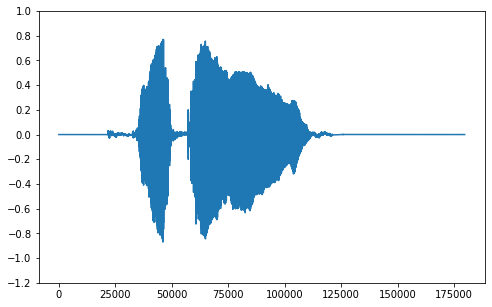

In [9]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = axes
ax.plot(audio_file.numpy())
ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
plt.show()

rate should equal the numbers of audio matrix rows 

In [12]:
display.display(display.Audio(audio_file, rate=179712/2))  

making spectrogram to the audio

In [13]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

In [14]:
def get_spectrogram(waveform):
  input_len = 179712
  waveform = waveform[:input_len]
  zero_padding = tf.zeros(
      [179712] - tf.shape(waveform),
      dtype=tf.float32)
  waveform = tf.cast(waveform, dtype=tf.float32)
  equal_length = tf.concat([waveform, zero_padding], 0)
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  spectrogram = tf.abs(spectrogram)
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

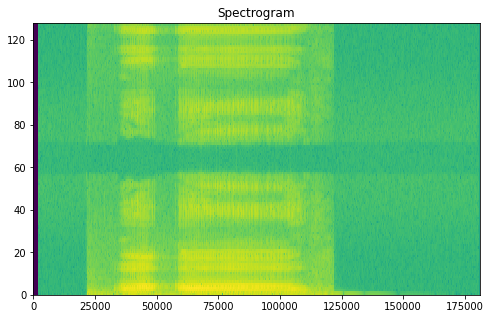

In [15]:
spectrogram = get_spectrogram(audio_file)
fig, axes = plt.subplots( figsize=(8, 5))
timescale = audio_file
plot_spectrogram(spectrogram.numpy(), axes)
axes.set_title('Spectrogram')
plt.show()

we can use the specto Images in modeling with CNN i think will be one of the right routes to work 

In [28]:
rev_aodio = tf.reverse(audio_file,axis=[-1])

we reversed the vector to show the result 

In [29]:
rev_aodio.shape

TensorShape([179712])

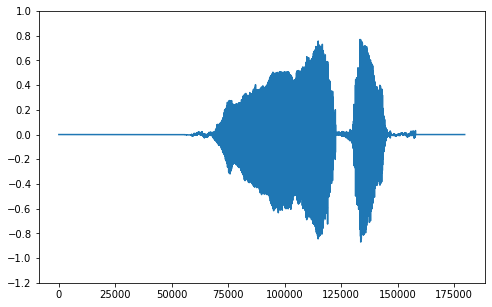

In [30]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = axes
ax.plot(rev_aodio.numpy())
ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
plt.show()

In [31]:
display.display(display.Audio(rev_aodio, rate=179712/2))  

## Encodeng

In [34]:
rev_aodio = tf.reshape(rev_aodio,[179712//2,2])

reshape the vector to 2 dim mat agian to making audio wave 

In [36]:
rev_file = tf.audio.encode_wav(rev_aodio,179712//2)

In [38]:
tf.io.write_file('rev_audio',rev_file)

In [52]:
file = tf.io.read_file('/content/rev_audio')
rev_file,_= tf.audio.decode_wav(contents=file)
display.display(display.Audio(tf.reshape(rev_file,rev_file.shape[0]*2), rate= rev_file.shape[0]))

# Done 
note : [this article](https://towardsdatascience.com/audio-processing-in-tensorflow-208f1a4103aa) Shows how to use the Fourier transform to process sound